In [2]:
from IPython.display import Image

# 통계적 추론과 Bootstrapping

## 추론이란
 - 우리가 알고싶은 것은 '모집단'의 특성이지만, 모집단을 파악하는 건 현실적으로 불가능
 - 따라서, 표본을 통해 얻은 통계량으로 모집단을 추정하는 것

# 1. 통계 이론에 근거한 추론


### (1) 점추정
 - 특정한 하나의 값으로 추정하는 것. (ex. 표본평균)
 - 단일 수치로 제공되면 틀릴 가능성이 높을수밖에 없음
 
### (2) 구간추정
 - 특정한 하나의 값이 아니라, 추정량의 분포를 이용하여 표본으로부터 <b>모수값을 포함하리라고 예상되는 구간(신뢰구간)</b>을 제시하는 것
 - 특징: <b>특정 확률 분포를 가정</b>하여 구성된다는 것과 <b>오차</b>를 갖는다는 것
 
### (3) 신뢰구간
 - 5% 신뢰구간: 동일한 방식으로, 동일한 모집단으로부터, 동일한 크기의 표본을 뽑아 100개의 신뢰 구간을 도출했을 때, 95번은 실제 모수가 포함되어 있을 것으로 기대
 
  1) 모분산을 아는 경우: 정규분포 활용 <br>
  2) 모분산을 모르는 경우 
    - a. n>=30 -> 정규분포 활용
    - b. n<30  -> t분포 활용 (모집단이 정규분포를 따른다는 가정 하에)

###### 참고자료
 - https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=iotsensor&logNo=222182891116

# 2. Bootstrap
 - 부트스트랩 표본: 관측 데이터 집합으로부터 얻은 복원 추출 표본

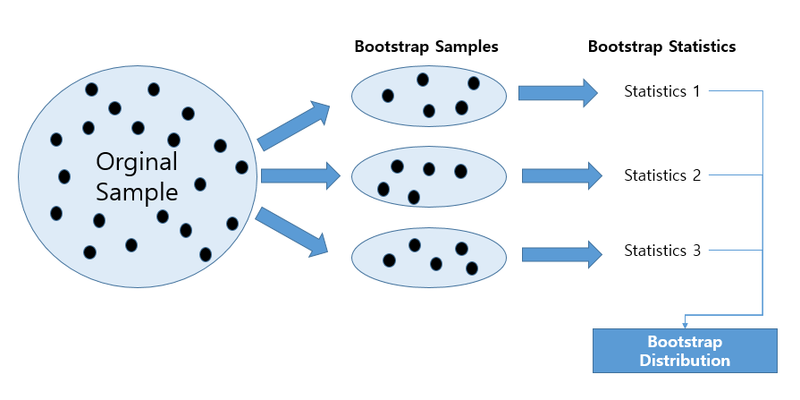

In [3]:
Image("C:/jupyter/[STUDY]statistics for ds/Basic_statistic/JawonMin/bootstrap.png")

### Bootstrap 알고리즘
1. 모집단에서 추출한 크기가 $n$인 표본 $S$가 있다고 가정해보자.
2. $S$로부터 중복 허용하여(복원추출) 크기가 $n$인 재표본을 추출한다. ($S_i$)
3. $S_i$의 표본 통계량을 측정하고 기록한다.
4. 2~3 과정을 $R$번 반복한다.
5. 위 과정을 통해 얻은 $R$개의 표본 통계량으로 $SE$ 추정치를 계산하여 표본 통계량의 분포를 확인할 수 있다.

In [92]:
'''
질문
 - Initial Sample과 같은 크기의 재표본을 추출해야 한다고 이해했는데, 맞는지?
'''

'\n질문\n - Initial Sample과 같은 크기의 재표본을 추출해야 한다고 이해했는데, 맞는지?\n'

### Bootstrap 신뢰구간
 - Bootstrap 알고리즘을 통해 얻은 $R$개 표본통계량 분포의 양 끝에서 $[(100-\alpha)/2]%$만큼 잘라낸 구간

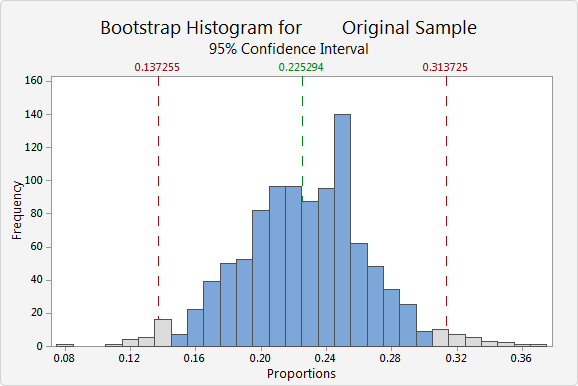

In [5]:
Image("C:/jupyter/[STUDY]statistics for ds/Basic_statistic/JawonMin/bootstrap_CI.png")

### Bootstrap을 이용하는 이유
 - 통계적 이론과 가정이 필요하지 않음. 즉, 간단한 방법으로 표준 오차와 신뢰구간 추정치를 도출 할 수 있음.
 - 새로운 표본을 추출하는 데 비용이 비싸지 않음
 (샘플링된 데이터의 다른 그룹을 얻기 위해 실험을 반복하는 비용을 피할 수 있음)
 
###### Q. 부트스트랩 방식은 관측값에 과하게 의존적인것 아닌가?
A. 
- 재표본 집단은 초기 샘플로부터 얻어진것이기 때문에, 특잇값이 재표본 추정치를 왜곡한다고 추정하는 것이 논리적이다.
- 하지만 이것이 사실일지라도, 전통적인 통계적 방법 또한 데이터셋 내의 특잇값은 평균을 왜곡하고 추정치와 표준오차를 부풀리는 것처럼 보인다.
- 따라서, 이상치가 재표본 집단 내에서 여러번 나타나 결과를 왜곡할 수 있다고 생각할 수 있지만, bootstrapping 접근 방식은 기존 접근 방식만큼 데이터에 의존한다.

###### [참고자료]
 - https://towardsdatascience.com/bootstrapping-statistics-what-it-is-and-why-its-used-e2fa29577307

# Bootstrapping 실습

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

###### 데이터
- Kaggle's House Prices - Advanced Regression Techniques
- 주택정보를 기반으로 거래가격을 예측하는 것을 목표로 하는 getting started competition

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [22]:
data = pd.read_csv('C:/data/train.csv') ;data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [24]:
## 위 데이터가 모집단이라고 가정하고, Bootstrapping 알고리즘으로 주택가격의 모평균을 추정해보자

# 1. initial sample
init_sample = data.sample(100, random_state=1129); init_sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1377,1378,50,RL,60.0,10998,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,117000
486,487,20,RL,79.0,10289,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,156000
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
693,694,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480
422,423,20,RL,100.0,21750,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,113000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,603,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
1236,1237,160,RL,36.0,2628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175500
394,395,50,RL,60.0,10134,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,109000
32,33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900


In [28]:
def bootstrap(sample_size, num_of_resample): 
    # 재표본추출된 표본집단의 통계량(평균)을 저장할 list
    stats = [] 
    
    for i in range(0, num_of_resample):
        # 표본으로부터 크기가 sample_size인 resample 추출하여 통계량(mean) 계산
        resample_mean = init_sample.sample(sample_size, replace=True)['SalePrice'].mean() 
        stats.append(resample_mean)
    
    return stats

In [94]:
resample_means = bootstrap(100, 500)

print('모평균:', data['SalePrice'].mean() )
print('초기 표본의 평균:', init_sample['SalePrice'].mean())
print('표본평균의 변동(SE 추정치):', np.std(resample_means))

모평균: 180921.19589041095
초기 표본의 평균: 187917.0
표본평균의 변동(SE 추정치): 9742.120003149841


(array([ 4., 11., 34., 75., 70., 57., 26., 14.,  3.,  6.]),
 array([158451.1  , 164732.068, 171013.036, 177294.004, 183574.972,
        189855.94 , 196136.908, 202417.876, 208698.844, 214979.812,
        221260.78 ]),
 <BarContainer object of 10 artists>)

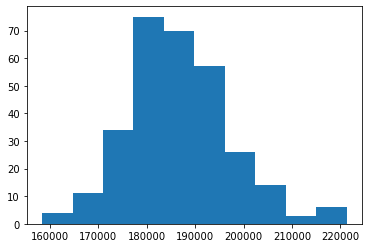

In [27]:
plt.hist(resample_means)

# 재표본추출
 - 재표본 추출: 관측 데이터로부터 반복해서 표본추출하는 과정
 
 (1) 순열검정: 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로 (또는 전부를) 재표본으로 추출하는 과정 <br>
 (2) 부트스트랩

### 순열검정 알고리즘

1. 여러 그룹(A, B, C, ...)의 결과(여러 표본)를 단일 데이터 집합으로 결합
2. 결합된 데이터를 잘 섞어, 그룹A와 동일한 크기의 샘플을 무작위 <b>비복원</b> 추출
3. 그룹 B, C, D, ... 에 동일한 작업 수행
4. 각 그룹별로 통계량 기록
5. 앞선 단계를 $R$번 반복하여 검정 통계량의 순열 분포를 얻는다.
6. 실험을 통해 얻은 그룹간 차이와, 순열 과정에서 얻은 집합에서의 차이 비교하여 가설을 검증한다. (ex. 두 집단 평균이 같다)

###### 순열검정의 핵심 아이디어
 - 귀무가설이 옳다는 가정 하에 진행된다는 점

# 순열검정 실습

In [52]:
import random

In [40]:
## 평균이 0이고 분산이 1인 정규분포를 따르는 집단 A
## 평균이 1이고 분산이 1인 정규분포를 따르는 집단 B

In [48]:
# 각 그룹의 초기 샘플
init_sample_A = np.random.normal(loc=0, scale=1, size=70).tolist()
init_sample_B = np.random.normal(loc=1, scale=1, size=30).tolist()

In [49]:
# 샘플 합치기
total_init = init_sample_A.copy()
total_init.extend(init_sample_B)

print(len(total_init))

100


In [50]:
# 합쳐진 샘플 섞기
total_init = np.random.permutation(total_init).tolist(); total_init

[0.7280220365610749,
 0.008824548547881915,
 -0.05904865723000817,
 0.5273572280310045,
 3.012211733775743,
 -0.3788625596094928,
 0.9219248220694372,
 -1.2253053081048804,
 -0.9460056674854043,
 0.3558095241835808,
 1.7304712342222168,
 -0.41273389600663735,
 0.3661825507104104,
 -0.5293476707828598,
 -1.4380994803165266,
 0.7868465990220386,
 0.6061649041004694,
 1.6096167137819866,
 -1.2667772590509627,
 -0.11845340747550068,
 0.26215893783683003,
 0.32380083239491486,
 1.6669844510964411,
 0.609086632812984,
 1.1938262223484006,
 -0.7164368686747271,
 0.7643920125003908,
 -1.328587065673591,
 0.6872132985910222,
 1.129992807793731,
 -0.4206435850324007,
 -1.0468800712175266,
 -1.007391783930265,
 2.695505102237359,
 -1.560686025183573,
 -0.8515082697119241,
 1.0983977378210468,
 -1.3232880442655117,
 -0.21647690257655286,
 0.6551407723709595,
 -0.916843584629456,
 1.8884266015017925,
 1.8130375605173004,
 1.953782558577009,
 -1.013366777855556,
 0.4570596893275475,
 -0.913652838107

In [70]:

# total_init[[temp]]
np.mean([total_init[i] for i in list(temp)])

0.46750087666042695

In [77]:
# 순열검정
def permutation_test(R):
    
    stats = []
    
    for i in range(0, R):
        idx_A = set(random.sample(range(100), 70))
        idx_B = set(range(100)) - idx_A
        
        stats_A = np.mean([total_init[i] for i in list(idx_A)])
        stats_B = np.mean([total_init[i] for i in list(idx_B)])
        
        stats.append(stats_B - stats_A)
    
    return stats
        

In [89]:
result = permutation_test(1000); result

[0.0771303583137048,
 0.1574233727445798,
 -0.24152150763737046,
 0.0857979860160048,
 0.4823340267891304,
 0.14503688368167095,
 -0.11258223117697652,
 -0.11749755315685273,
 0.1137193698335886,
 -0.039344448933814224,
 -0.10238926300611079,
 -0.04687042663672997,
 -0.31176005563608167,
 -0.13094932503198603,
 -0.25260937877700373,
 -0.012705463242368431,
 0.19234197189633767,
 0.3978467930752386,
 0.00823486816160346,
 -0.1401789091877598,
 -0.09239142070430323,
 0.4430459492400185,
 -0.18341643454917622,
 -0.20347288329784724,
 -0.033607223934666364,
 0.07900279880338767,
 0.11457409758297704,
 -0.0940848300663823,
 0.1823041425728597,
 0.25939619966314426,
 -0.036809344011941025,
 0.07362115000004854,
 0.43909791763238554,
 -0.1327609278504363,
 -0.12801903379306004,
 -0.005228075052617576,
 -0.23873301598406052,
 -0.08002445427189742,
 0.03898438947110677,
 0.20832826222954548,
 0.6050692628726383,
 0.06924015883876272,
 -0.5114828385259546,
 -0.13751865566119054,
 0.0377860837197

(array([  4.,  11.,  49., 130., 209., 253., 190., 101.,  43.,  10.]),
 array([-0.81477966, -0.66708944, -0.51939922, -0.371709  , -0.22401878,
        -0.07632856,  0.07136166,  0.21905188,  0.3667421 ,  0.51443233,
         0.66212255]),
 <BarContainer object of 10 artists>)

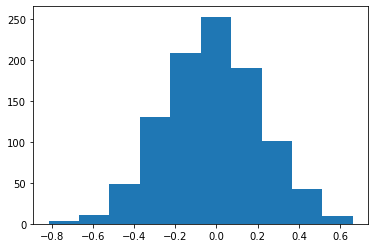

In [90]:
plt.hist(result)

In [91]:
print('초기표본의 평균 차이: ', np.mean(init_sample_B)-np.mean(init_sample_A))

초기표본의 평균 차이:  0.826524487941167
